In [12]:
b1 <- -13.89 / 22.67
b0 <- 5.89 - b1 * 7.5
c(b0, b1)

[1] 10.485280 -0.612704

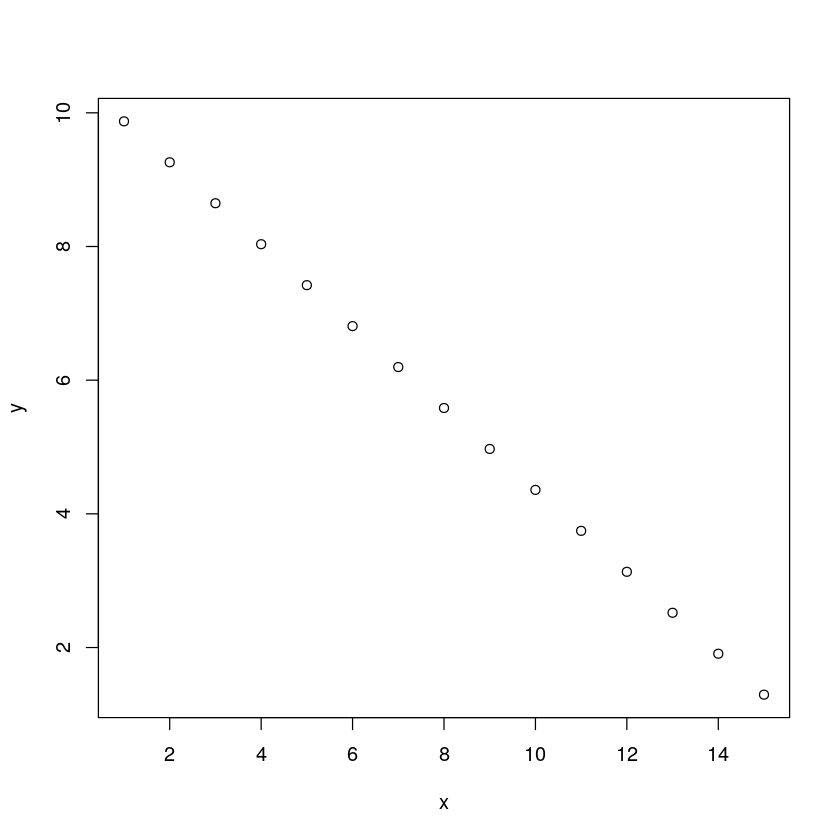

In [13]:
x <- seq(from=1, to=15, by = 1)
y = (x * b1) + b0
plot(y ~ x)

In [26]:
sse.a = 71.32
sse.c = 13.27 * (16 - 1)
pre = (sse.c - sse.a) / sse.c
pre
f = (pre / ((1 - pre) / 14))
f

[1] 0.6416981

[1] 25.07319

In [27]:
diff <- sqrt(4.60 * (71.32 / 14) / (15 * 22.67))
c(b1-diff,b1+diff)

[1] -0.875216 -0.350192

In [30]:
correlation <- -13.89 / sqrt(22.67 * 13.27)
correlation ** 2

[1] 0.6413307

In [33]:
library(foreign)
d <- as.data.frame(read.spss("./2017_Questionnaire_1_cleaned.sav"))
summary(d)

Warning message in read.spss("./2017_Questionnaire_1_cleaned.sav"):
“./2017_Questionnaire_1_cleaned.sav: File-indicated value is different from internal value for at least one of the three system values.  SYSMIS: indicated -1.79769e+308, expected -1.79769e+308; HIGHEST: 1.79769e+308, 1.79769e+308; LOWEST: -1.79769e+308, -1.79769e+308”Warning message in read.spss("./2017_Questionnaire_1_cleaned.sav"):
“./2017_Questionnaire_1_cleaned.sav: Unrecognized record type 7, subtype 18 encountered in system file”

  Response_ID         Height          Weight           Age           Gender   
 Min.   :519833   Min.   :150.0   Min.   :40.00   Min.   :18.00   Female:128  
 1st Qu.:520436   1st Qu.:164.0   1st Qu.:55.00   1st Qu.:22.00   Male  : 62  
 Median :521902   Median :170.0   Median :61.00   Median :23.00               
 Mean   :522593   Mean   :170.1   Mean   :63.57   Mean   :25.15               
 3rd Qu.:524043   3rd Qu.:177.0   3rd Qu.:71.75   3rd Qu.:26.00               
 Max.   :528705   Max.   :196.0   Max.   :99.00   Max.   :49.00               
                                                  NA's   :1                   
    Self_esteem  Lecturer_age   Lecturer_height TelephoneDigit 
 High     :69   Min.   :28.00   Min.   :168.0   Min.   :0.000  
 Low      :22   1st Qu.:34.00   1st Qu.:180.0   1st Qu.:3.000  
 Moderate :87   Median :35.00   Median :185.0   Median :5.000  
 Very high: 8   Mean   :36.42   Mean   :185.7   Mean   :4.914  
 Very Low : 4   3rd Qu.:38.00   3rd Qu.:190.0   

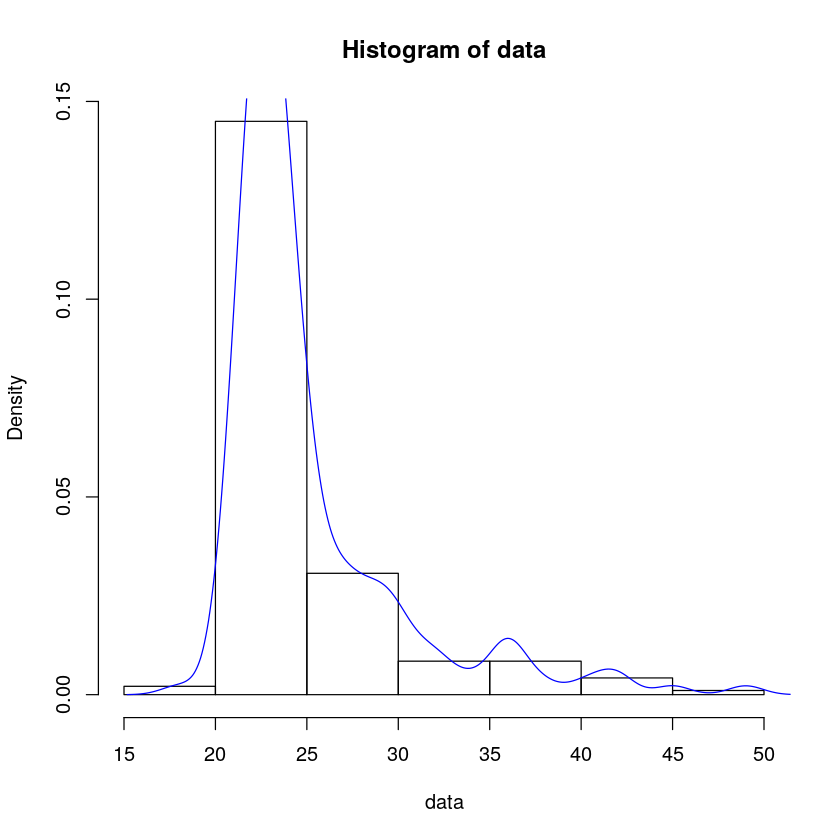

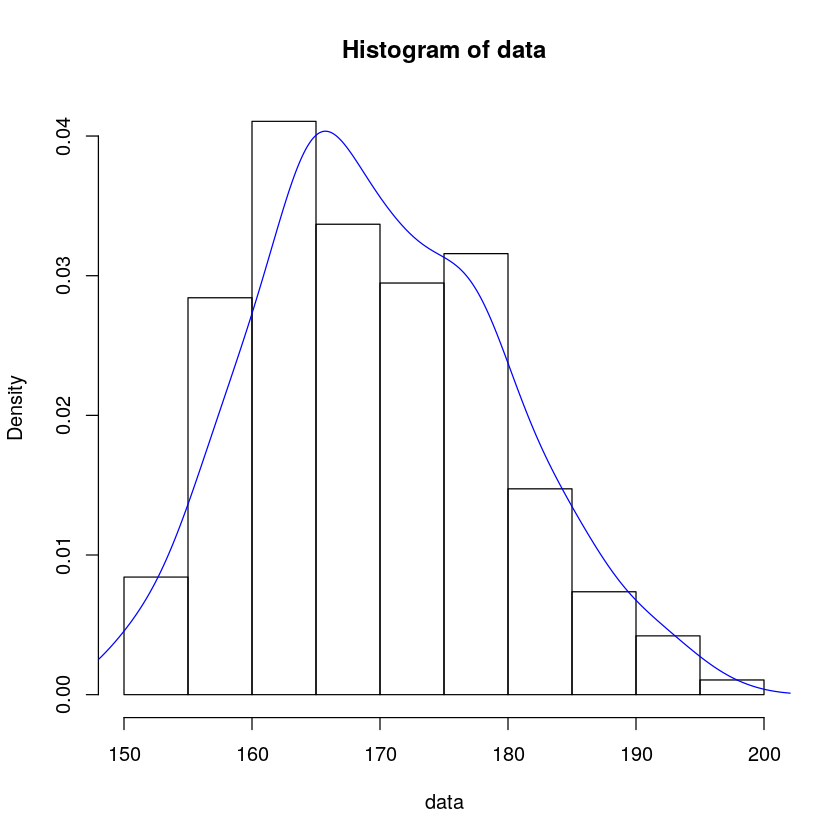

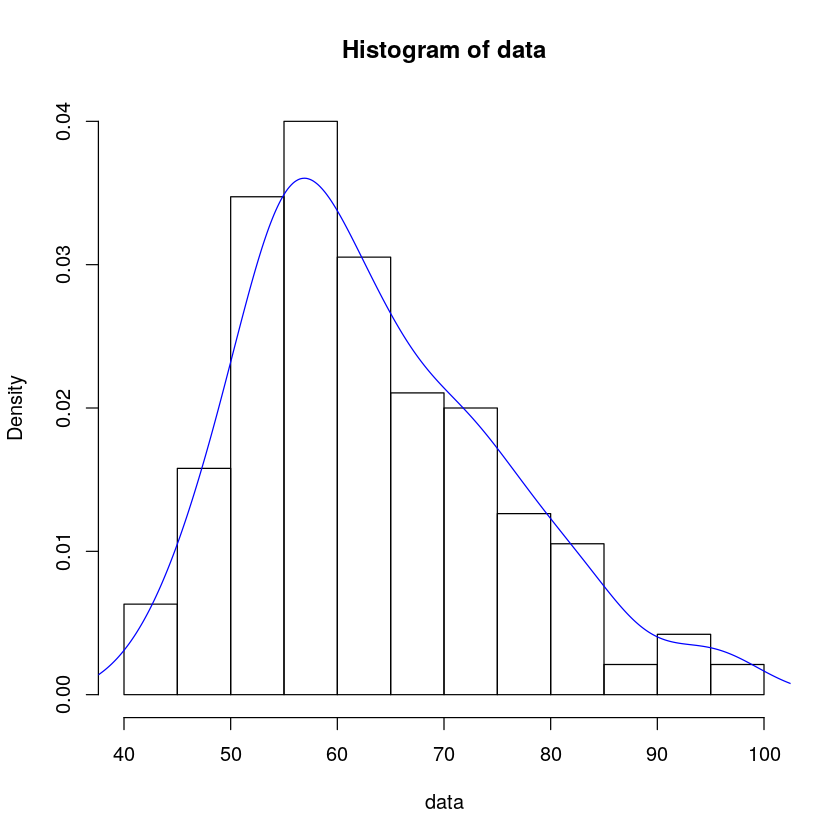

In [47]:
dhist <- function(data) {
hist(data, prob=TRUE)
lines(density(data, na.rm=TRUE), col="blue")
}
dhist(d$Age)
dhist(d$Height)
dhist(d$Weight)

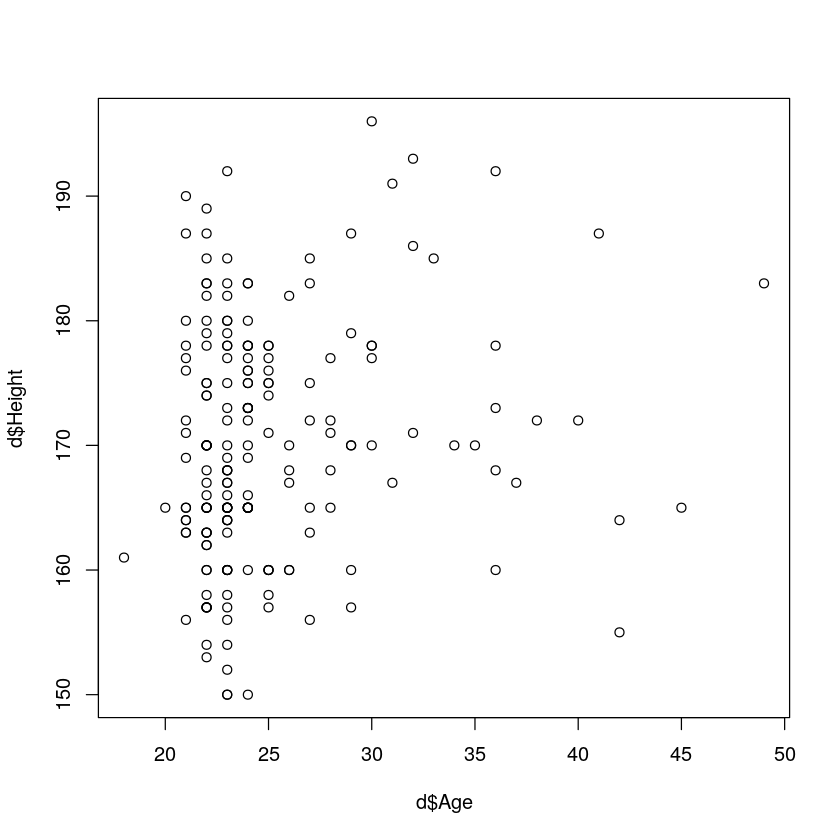

In [49]:
plot(d$Height ~ d$Age)


Call:
lm(formula = Weight ~ Height, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.541  -6.225  -1.249   4.208  32.948 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -91.83747   10.77952   -8.52  5.1e-15 ***
Height        0.91343    0.06326   14.44  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.305 on 188 degrees of freedom
Multiple R-squared:  0.5259,	Adjusted R-squared:  0.5233 
F-statistic: 208.5 on 1 and 188 DF,  p-value: < 2.2e-16


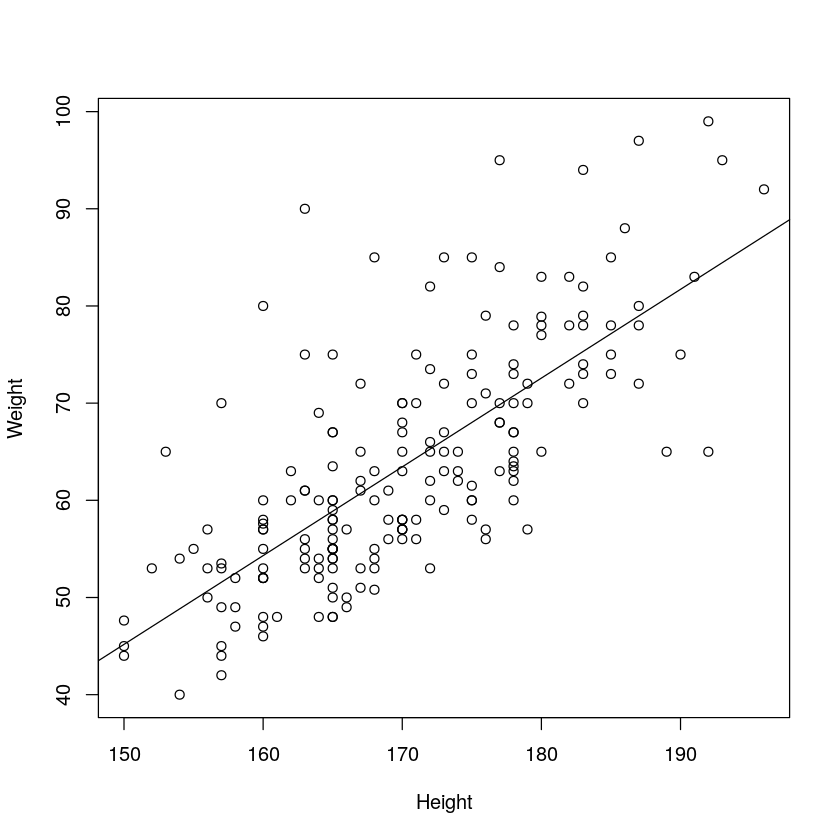

In [57]:
plot(Weight ~ Height, data=d)
model <- lm(Weight ~ Height, data=d)
summary(model)
abline(model)


Call:
lm(formula = Weight ~ Age, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.577  -8.577  -1.577   8.423  31.584 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  48.0906     4.4177  10.886  < 2e-16 ***
Age           0.6130     0.1724   3.557 0.000476 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.68 on 187 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.06336,	Adjusted R-squared:  0.05835 
F-statistic: 12.65 on 1 and 187 DF,  p-value: 0.0004758


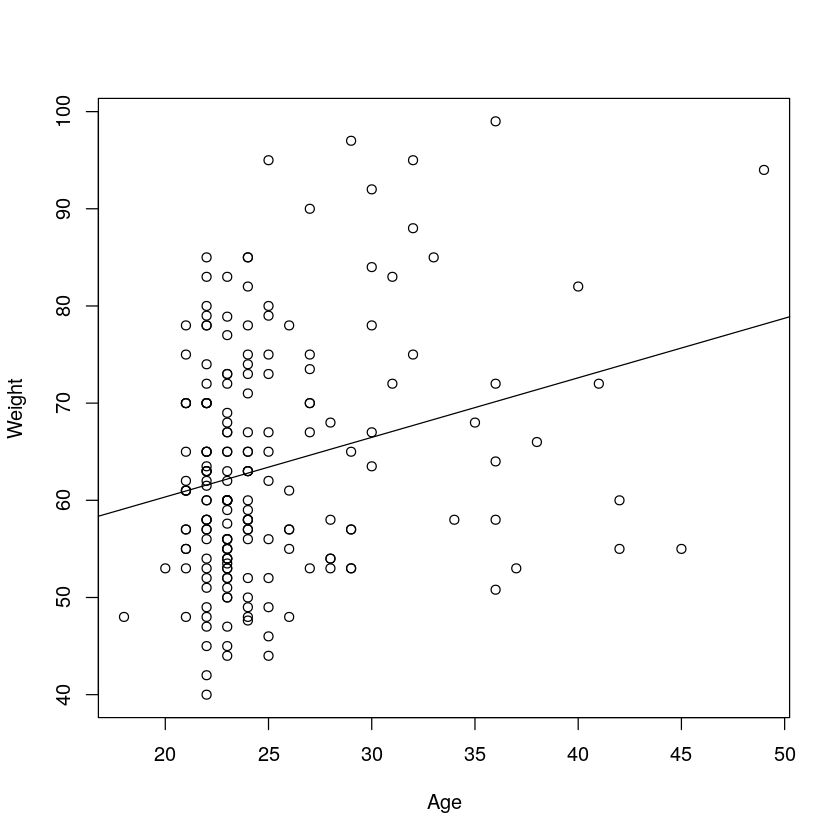

In [59]:
plot(Weight ~ Age, data=d)
model <- lm(Weight ~ Age, data=d)
summary(model)
abline(model)

In [62]:
model <- lm(Weight ~ Height + Age, data=d)
summary(model)


Call:
lm(formula = Weight ~ Height + Age, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.296  -5.715  -0.865   4.533  32.293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -96.66691   10.59289  -9.126  < 2e-16 ***
Height        0.89295    0.06256  14.274  < 2e-16 ***
Age           0.32677    0.12106   2.699  0.00759 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.087 on 186 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.553,	Adjusted R-squared:  0.5482 
F-statistic: 115.1 on 2 and 186 DF,  p-value: < 2.2e-16


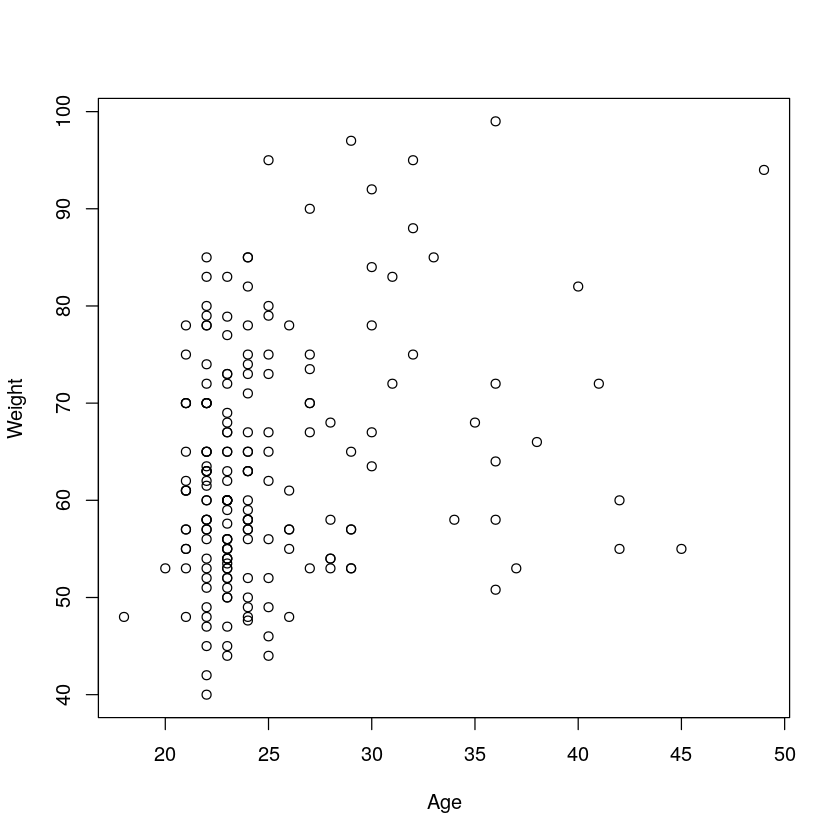

In [63]:
plot(Weight ~ Age, data=d)
model <- lm(Weight ~ Age, data=d)
weight.age <- residuals(model)
rmodel <- lm(weight.age ~ d$)